# Challenge: Factors that affect life expectancy
Throughout this module, we dove deep into the topics of exploratory data analysis (EDA) and its substeps. Now it's time to apply your knowledge. In this challenge, you'll work with the Life Expectancy dataset from Kaggle. The data is collected from the websites of the World Health Organisation (WHO) and World Bank (WB). The dataset contains annual variables for many of the countries in the world which are divided into several broad categories: immunization related factors, mortality factors, economical factors, and social factors.

https://www.kaggle.com/kumarajarshi/life-expectancy-who

You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

To complete this challenge, submit a Jupyter notebook containing your solutions to the following tasks. Moreover, you can also submit a kernel to the Kaggle containing your solutions.

- Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

- First, load the dataset.

- Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

- Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

- In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

- Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

# step 1

In [141]:
%matplotlib inline
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats

warnings.filterwarnings('ignore')

# step 2
First, load the dataset.

In [142]:
# First, load the dataset.
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df_original = pd.read_sql_query('select * from '+ table_name,con=engine)
engine.dispose()

In [143]:
df_original.info()
df_original.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# step 3
Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

### step 3.1 discriptive statistics
use df.describe() to examine the data

### step 3.2 nonsense value check
- for valuables inlcuding 'Adult Mortality', "infrant deaths', 'Measles', 'under-five deaths', by definition, it is 'Number of Infant Deaths per 1000 population', so it doesn't make sense if certain values are over 1000 for such varialbes. Whilst, we can spot 14 infant deaths records that are over 1000. (i.e. df[df['infant_deaths'] >=1000]), we can change them to nan
- also those zero values across 'infant deaths',  'measeles', and such are questionable, but not totally nonsense, so we can just keep them at this point.

### step 3.3 fill nan
- the data is time seriers, so use interpolate() to fill nan values
- also, it makes more sense to fill nan values within each coutry

### step 3.4 outliers handeling
- to be continued

In [144]:
# make a copy of the orignial dataframe, df
df = df_original.copy()

# get rid of the white space at the end of column names, and change with '_' in between
df.columns = df.columns.str.rstrip()
df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.replace(' ', '_')

df.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [145]:
# get rid of nonsense values and replace with np.nan, 
for col in ['Adult_Mortality', 'infant_deaths', 'Measles', 'under-five_deaths']:
# for col in ['under-five deaths']:    
#     print(df.loc[df[col] >=1000, col])
    df.loc[df[col] >=1000, col] = np.nan

# fill nan within coutries
for col in df.columns.unique():
    if col not in ['Country', 'Year', 'Status']:
        for country in df.Country.unique():
            df.loc[df.Country==country, col] = df.loc[df.Country==country, col].interpolate()
# then drop nan
df = df.dropna()


### potiential effects of outliers
- They skew the descriptive statistics of the data. For example, consider one of the most commonly used descriptive statistics—the mean. This value can be severely skewed by outliers.
- Some machine learning models are sensitive to extreme values. In order to get more accurate estimates, we need to eliminate those values from our dataset.

### step 3.4 outliers handeling
- use boxplot to visualize outliers, set whis=1.5
- use winsorization to drop outliers. 

##### Note: 
- I performed two trials for winsorization. The 1st trial uses fixed threshold, the 2nd trial uses flexible threshold based on how many outliers are there for each column. 
- both trials can get rid of all the outliers, but
- the result of 2nd trial is perferable, since more data can remain its orignial values.
- it is also possible to transform the outliers, i.e. using log transformation. I didn't perform in this stage though, but as a reminder, I will perform log transformation later if desired. 

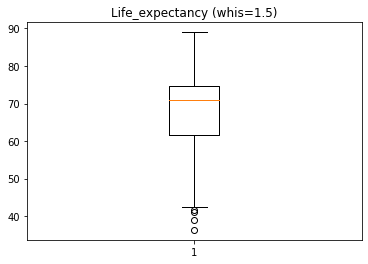

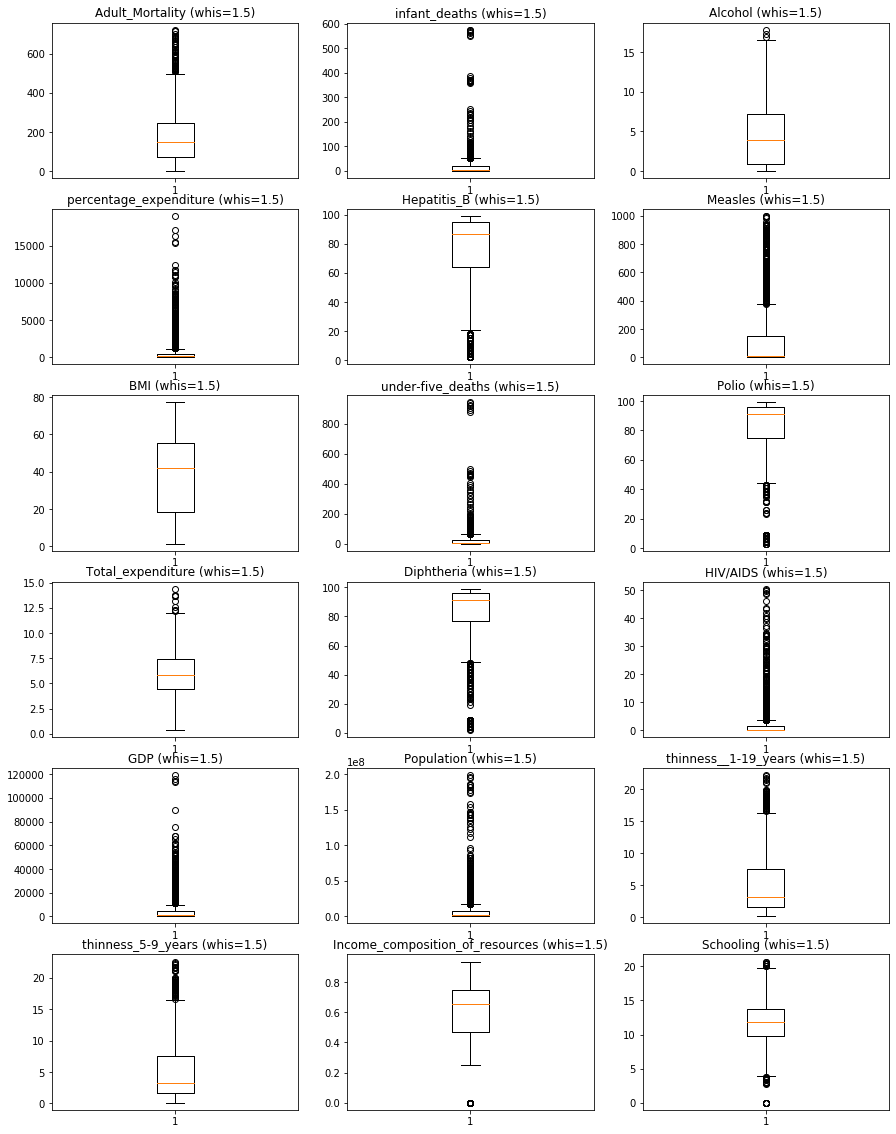

In [146]:
# work on outliers

# life_expectancy: our target
plt.boxplot(df['Life_expectancy'])
plt.title("{} (whis=1.5)".format('Life_expectancy'))
plt.show()

plt.figure(figsize=(15, 20))
for col,index in zip(df.columns.unique(), range(len(df.columns.unique()))):
    if col not in ['Country', 'Year', 'Status', 'Life_expectancy']:
        plt.subplot(6,3,index-3)
        plt.boxplot(df[col])
        plt.title("{} (whis=1.5)".format(col))
plt.show()

In [147]:
# working on outliers 
# count outliers under 1.5 threshold, represent in portion for later use in winsorization
threshold = 1.5
record_num = len(df)

lower_list = []
upper_list = []
for col,index in zip(df.columns.unique(), range(len(df.columns.unique()))):
    if col not in ['Country', 'Year', 'Status']:
        q75, q25 = np.percentile(df[col], [75 ,25])
        iqr = q75 - q25
        min_val = q25 - (iqr*threshold)
        max_val = q75 + (iqr*threshold)
#         store the upper bound and lower bound
        lower_list.append(len(np.where((df[col] < min_val))[0]) / record_num)
        upper_list.append(len(np.where((df[col] > max_val))[0]) / record_num)
        print("{:25s} : ".format(col)
        + "percentile of lower outliers is: {:2f},\t   ".format(len(np.where((df[col] < min_val))[0]) / record_num)\
        + "percentile of upper outliers is: {:2f}. ".format(len(np.where((df[col] > max_val))[0]) / record_num) )                       
             
     

Life_expectancy           : percentile of lower outliers is: 0.002090,	   percentile of upper outliers is: 0.000000. 
Adult_Mortality           : percentile of lower outliers is: 0.000000,	   percentile of upper outliers is: 0.028213. 
infant_deaths             : percentile of lower outliers is: 0.000000,	   percentile of upper outliers is: 0.102926. 
Alcohol                   : percentile of lower outliers is: 0.000000,	   percentile of upper outliers is: 0.001567. 
percentage_expenditure    : percentile of lower outliers is: 0.000000,	   percentile of upper outliers is: 0.118077. 
Hepatitis_B               : percentile of lower outliers is: 0.109718,	   percentile of upper outliers is: 0.000000. 
Measles                   : percentile of lower outliers is: 0.000000,	   percentile of upper outliers is: 0.135319. 
BMI                       : percentile of lower outliers is: 0.000000,	   percentile of upper outliers is: 0.000000. 
under-five_deaths         : percentile of lower outliers

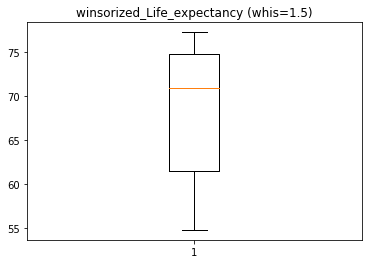

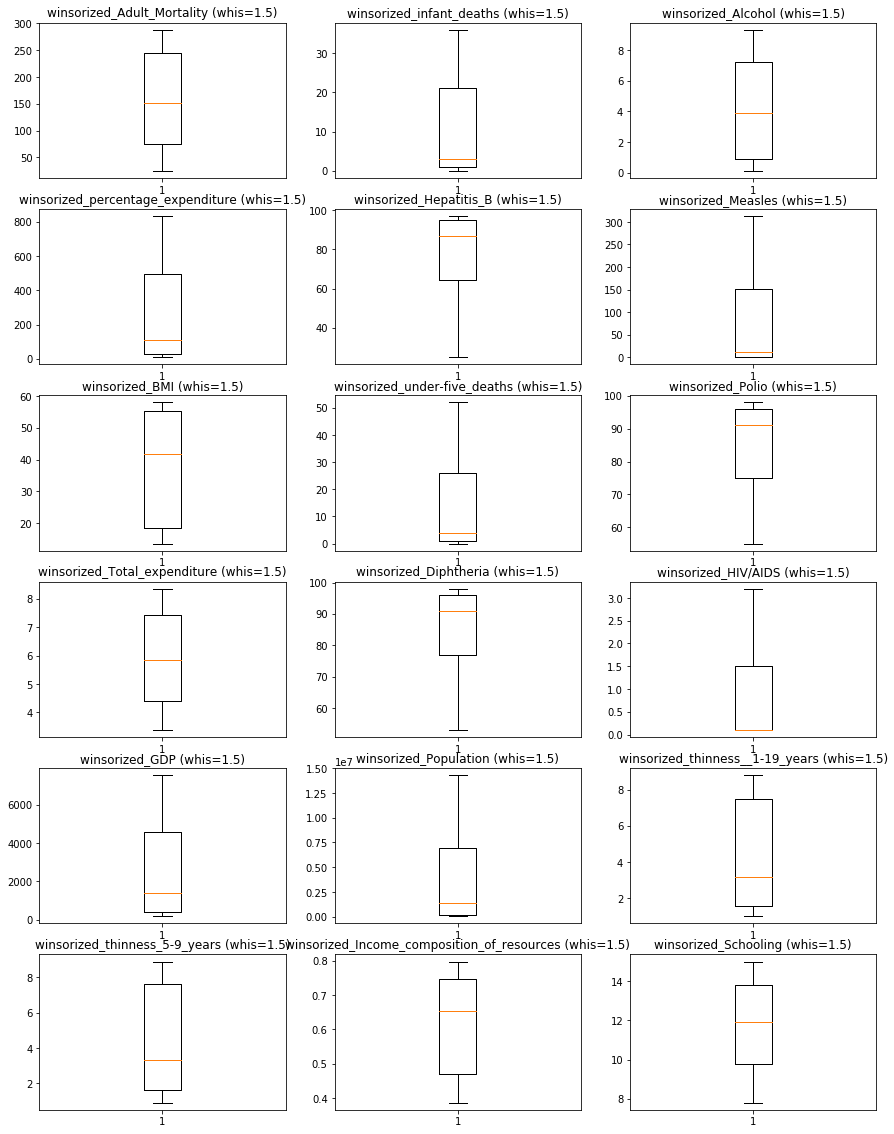

In [148]:
# trial 1, perform winsorization, use fixed threshold (0.12, 0.16) for all columns

import scipy.stats.mstats

df_winsor = df.copy()
winsorized_list = []
for col,index in zip(df_winsor.columns.unique(), range(len(df_winsor.columns.unique()))):
    if col not in ['Country', 'Year', 'Status']:
        df_winsor['winsorized_'+ col] = scipy.stats.mstats.winsorize(df_winsor[col], (0.12, 0.16))
        winsorized_list.append('winsorized_'+ col)

        
plt.boxplot(df_winsor['winsorized_'+'Life_expectancy'])
plt.title("{} (whis=1.5)".format('winsorized_'+'Life_expectancy'))
plt.show()

plt.figure(figsize=(15, 20))
for col,index in zip(winsorized_list, range(len(winsorized_list))):
    if col not in ['Country', 'Year', 'Status', 'winsorized_'+'Life_expectancy']:
        plt.subplot(6,3,index)
        plt.boxplot(df_winsor[col])
        plt.title("{} (whis=1.5)".format(col))
plt.show()

df_trial1 = df_winsor.copy()

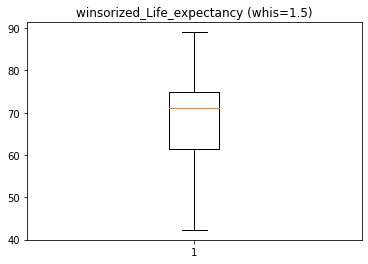

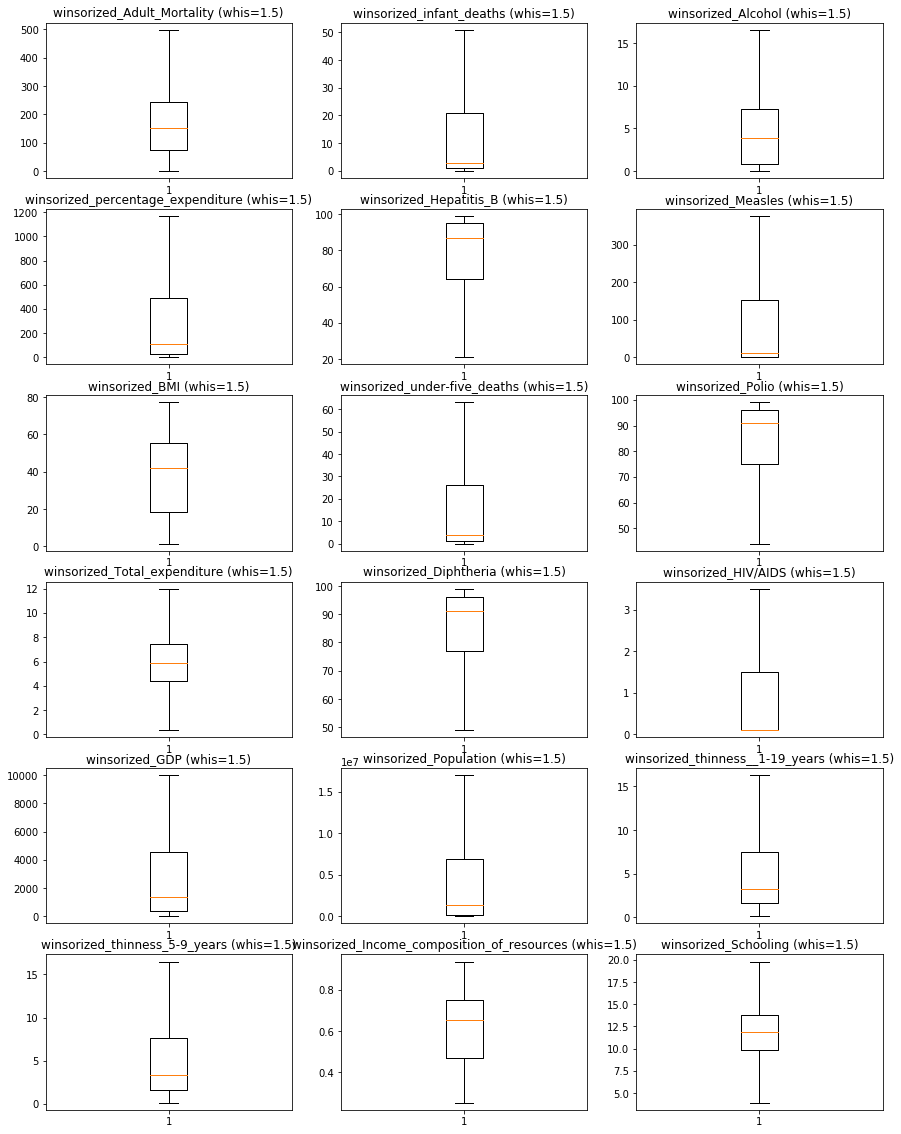

In [149]:
# trial 2, perform winsorization, use flexible threshold for each column, based on the percentile of outiers

# import scipy.stats.mstats

df_winsor = df.copy()
winsorized_list = []
for col in df.columns.unique():
    if col not in ['Country', 'Year', 'Status']:
        winsorized_list.append( col)
    
    
for col,index in zip(winsorized_list, range(len(winsorized_list))):
#     if col not in ['Country', 'Year', 'Status']:
    df_winsor['winsorized_'+ col] = scipy.stats.mstats.winsorize(df_winsor[col], (lower_list[index], upper_list[index]))
#         winsorized_list.append('winsorized_'+ col)

        
plt.boxplot(df_winsor['winsorized_'+'Life_expectancy'])
plt.title("{} (whis=1.5)".format('winsorized_'+'Life_expectancy'))
plt.show()

plt.figure(figsize=(15, 20))
for col,index in zip(winsorized_list[1:], range(len(winsorized_list[1:]))):
    plt.subplot(6,3,index+1)
    plt.boxplot(df_winsor['winsorized_'+ col])
    plt.title("{} (whis=1.5)".format('winsorized_'+col))
plt.show()

df_trial2 = df_winsor.copy()

# step 4
Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

### univariant exploration
- we can choose discriptive statistics method (i.e. .describe())
- or visulization method, (i.e. histogram or boxplot) for continous variables, which is the case in this challenge

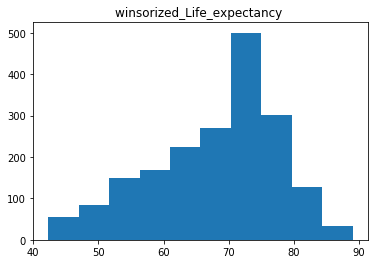

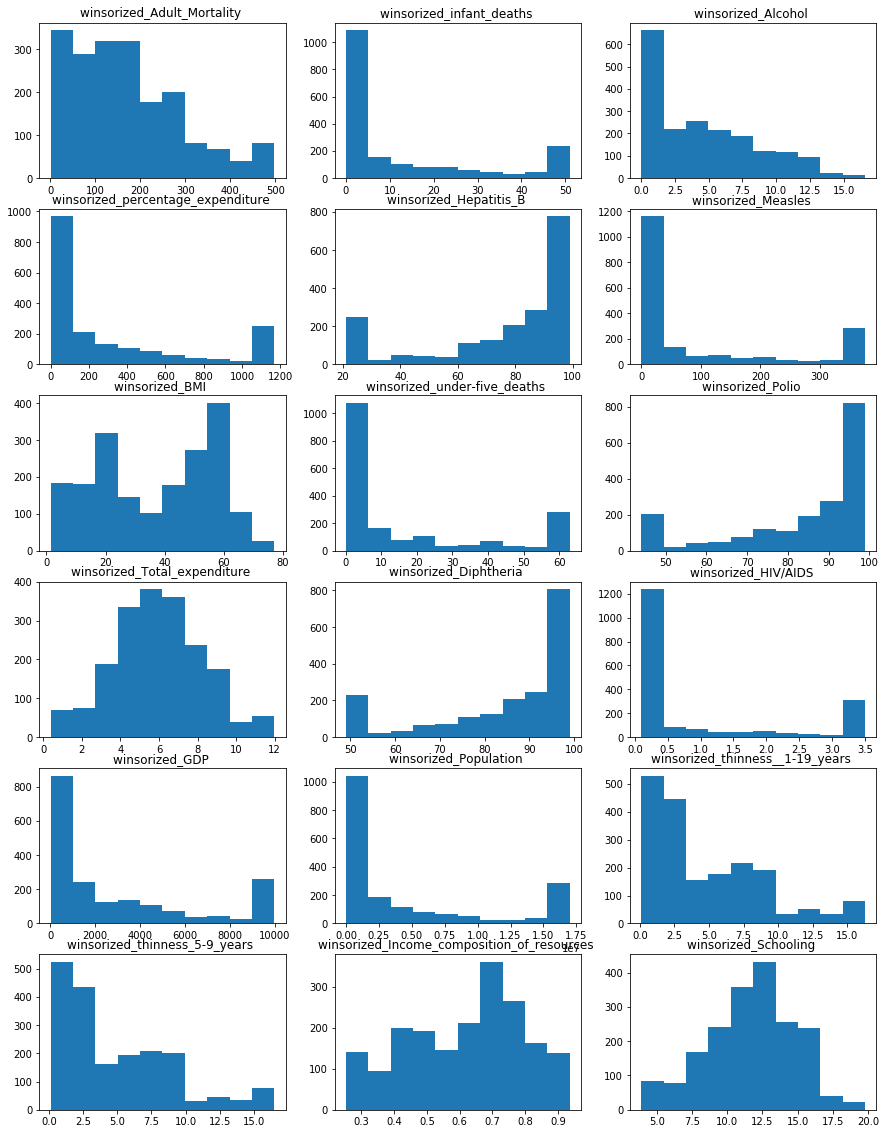

In [150]:
# univariant exploration
# visulization of distribution using histogram

plt.hist(df_winsor['winsorized_'+'Life_expectancy'])
plt.title("{} ".format('winsorized_'+'Life_expectancy'))
plt.show()

plt.figure(figsize=(15, 20))
for col,index in zip(winsorized_list[1:], range(len(winsorized_list[1:]))):
    plt.subplot(6,3,index+1)
    plt.hist(df_winsor['winsorized_'+ col])
    plt.title("{} ".format('winsorized_'+col))
plt.show()


### step 4. 1 multivariant exploration
we are focusing on finding the correlation, and the mothods include
- scatter plot
- correlation matrix, i.e. .corr()
- heatmap

in this challenge, I will choose scatter plot and heatmap method, because the information in correlation matrix can be covered from heatmap has well.

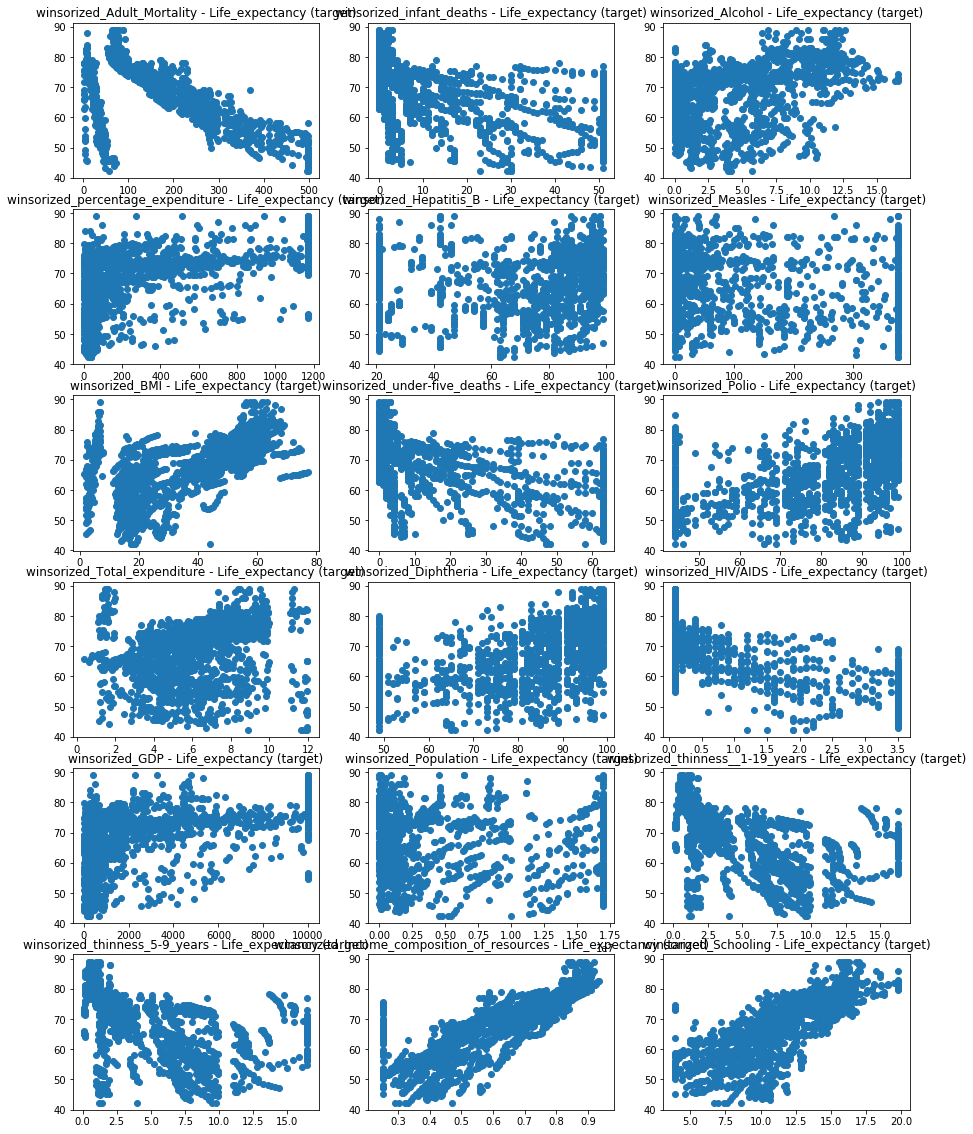

In [151]:
# scatter plot to show correlation between each column and the target variable
# at the first glance, adult_motality, HIV/AIDS, composition_of_resource, and schooling 
# have high coorelation with our target variable life_expectancy

# work on the winsorized part
df_clean = df_winsor.iloc[:,22:].copy()

plt.figure(figsize=(15, 20))
for col,index in zip(df_clean.columns.unique()[1:], range(len(df_clean.columns.unique()[1:]))):
    plt.subplot(6,3,index+1)
    plt.scatter(df_winsor[col], df_winsor['winsorized_'+'Life_expectancy'])
    plt.title("{} - Life_expectancy (target)".format(col))
plt.show()


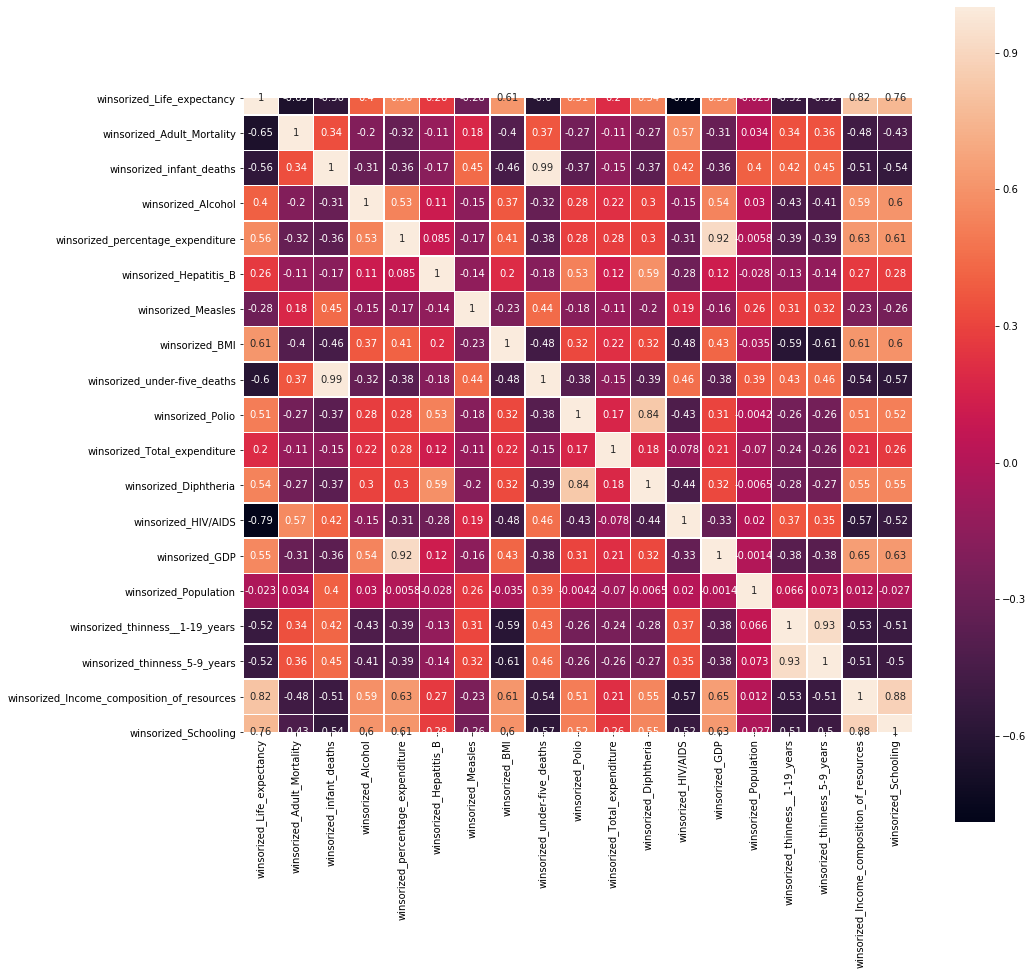

In [152]:
# calculate the correlation coefficient and illustrate using heatmap
plt.figure(figsize=(15,15))

# draw the heatmap using seaborn.
sns.heatmap(df_clean.corr(), square=True, annot=True, linewidths=.5)
# plt.title("correlation matrix")
plt.show()

### intermediate summary for step 4
- the relationship between the target variable and the rest can be represented by correlationship/ colinearity
- we can use visulazation (scatter plot) or use discriptive statistics (correlation coefficient) to illustrate correlationship
- In this study case, the top correlation between target variable and the rest of the column is income_composition_of_resource = 0.82, HIV/AIDS = -0.79, schooling = 0.76, 
- normally, a correlation coeffient higher than 0.7 indicates strong correlationship, (either positive or negative). So, the relevant variables tha may affect life expectancy including "income_composition_of_resource" (cc=0.82), "HIV/AIDS" (cc=-0.79), "schooling" (cc=0.76).

# step 5
In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

### ANS:
we can apply a mask on the heat map to highlight very low and/or very high correlation coefficient
- High cc check. High correlation coefficient pair include infant_deaths- under-five_deaths (cc=0.99), thinness__1-19_years - thinness_5-9_years (cc=0.93), percentage_expenditure-GDP (cc=0.92), Income_composition_of_resources – schooling(cc=0.88), Polio-Diphtheria (cc=0.84), 
- Since,high correlation coefficient might cause unstability, we can get rid of one variable in each of the pair. I chose to drop the one with weaker CC with our target variables, i.e. drop infant_deaths, thinness_5-9_years, GDP, schooling, polio.
- Low cc check. This time, we drop columns have very low correlation with the target variable. The one we would drop is Population (cc=-0.023)


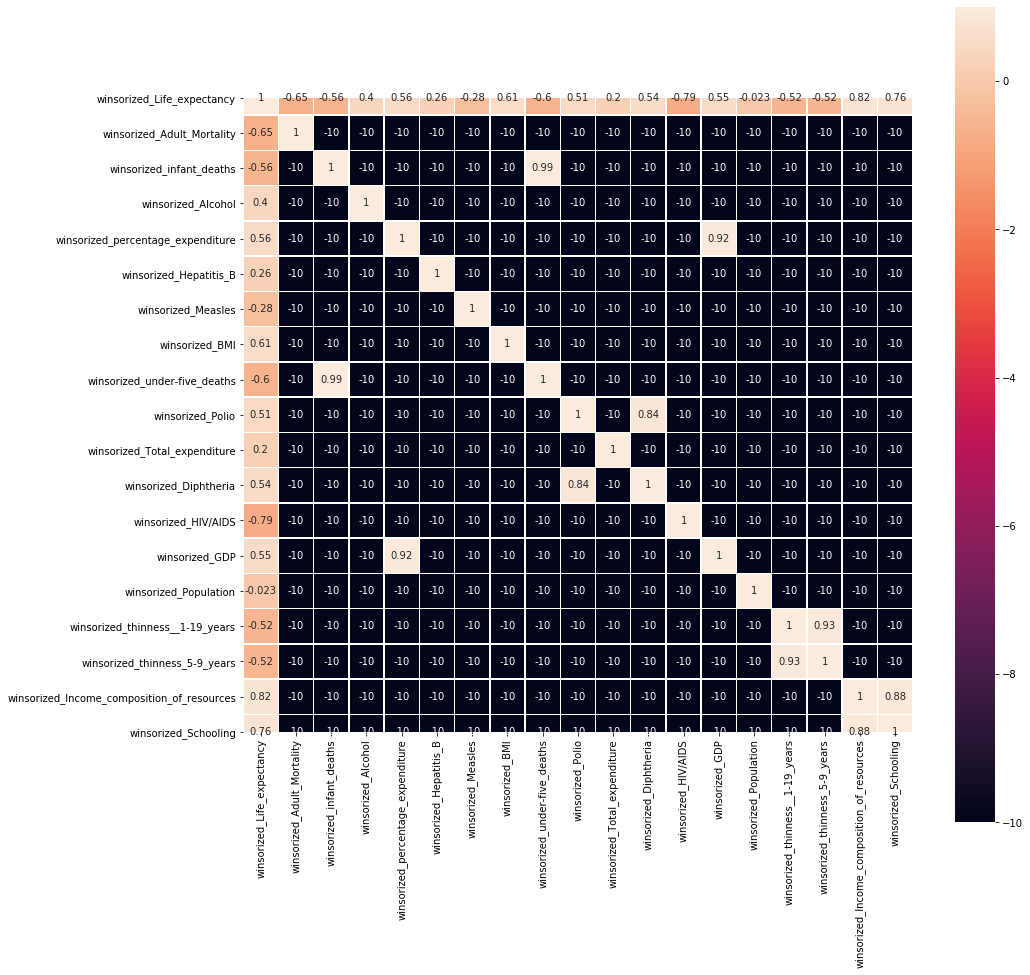

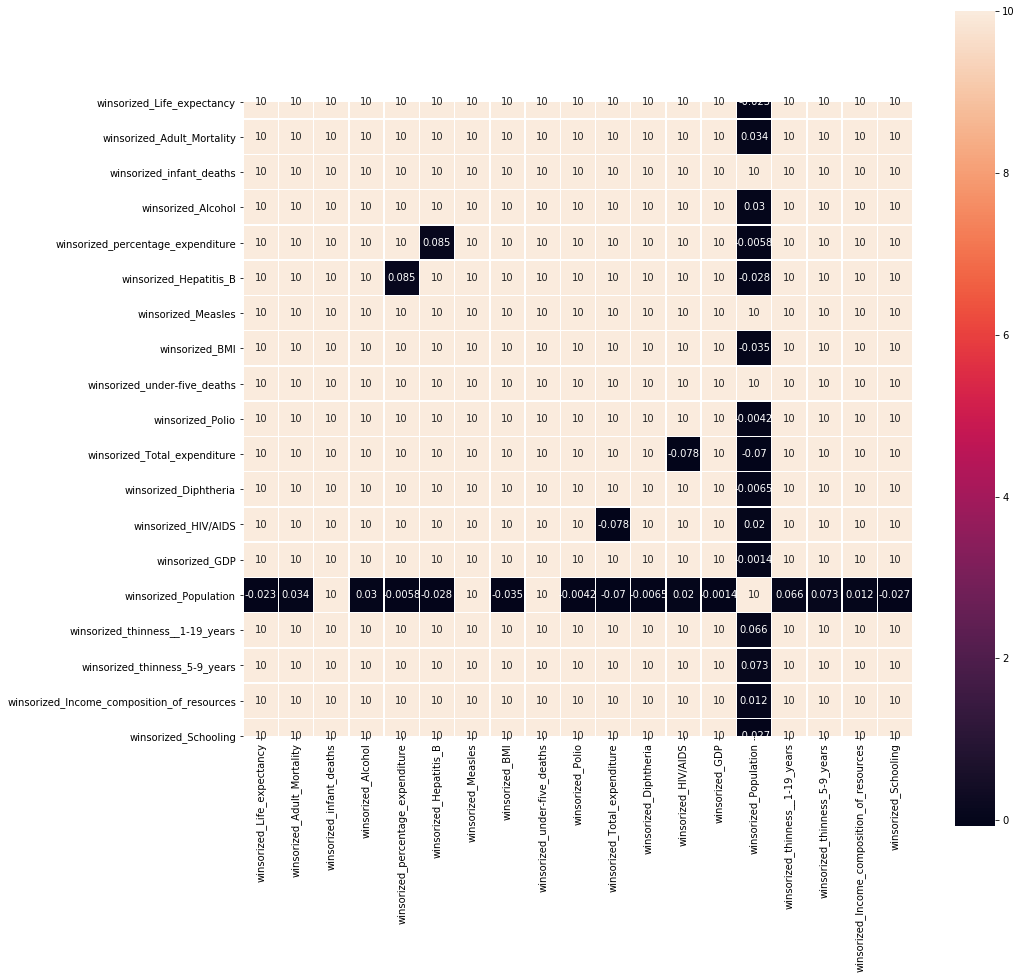

In [153]:
# calculate the correlation coefficient and illustrate using heatmap
plt.figure(figsize=(15,15))
df_corr_matrix = df_clean.corr()
# apply a mask on the corr, that only show high correlation (cc>=0.7), and under triangle part
df_corr_matrix.iloc[1:,1:][np.abs(df_corr_matrix)<.7] = -10
# draw the heatmap using seaborn.
sns.heatmap(df_corr_matrix, square=True, annot=True, linewidths=.5)
# plt.title("correlation matrix")
plt.show()


plt.figure(figsize=(15,15))
df_corr_matrix = df_clean.corr()
# apply a mask on the corr, that only show low correlation (cc<0.1), and under triangle part
df_corr_matrix[np.abs(df_corr_matrix)>.1] = 10
# draw the heatmap using seaborn.
sns.heatmap(df_corr_matrix, square=True, annot=True, linewidths=.5)
# plt.title("correlation matrix")
plt.show()

In [154]:
# drop the columns and make a copy of new dataframe to work on.

col_list_new = ['winsorized_Life_expectancy', 'winsorized_Adult_Mortality',
       'winsorized_Alcohol', 'winsorized_percentage_expenditure',
       'winsorized_Hepatitis_B', 'winsorized_Measles', 'winsorized_BMI',
       'winsorized_under-five_deaths',
       'winsorized_Total_expenditure', 'winsorized_Diphtheria',
       'winsorized_HIV/AIDS', 
       'winsorized_thinness__1-19_years',
       'winsorized_Income_composition_of_resources']

df_trimmed = df_clean[col_list_new].copy()
df_trimmed

,winsorized_Life_expectancy,winsorized_Adult_Mortality,winsorized_Alcohol,winsorized_percentage_expenditure,winsorized_Hepatitis_B,winsorized_Measles,winsorized_BMI,winsorized_under-five_deaths,winsorized_Total_expenditure,winsorized_Diphtheria,winsorized_HIV/AIDS,winsorized_thinness__1-19_years,winsorized_Income_composition_of_resources
1,59.9,271.0,0.01,73.523582,62.0,376.0,18.6,63.0,8.18,62.0,0.1,16.3,0.476
2,59.9,268.0,0.01,73.219243,64.0,376.0,18.1,63.0,8.13,64.0,0.1,16.3,0.470
3,59.5,272.0,0.01,78.184215,67.0,376.0,17.6,63.0,8.52,67.0,0.1,16.3,0.463
4,59.2,275.0,0.01,7.097109,68.0,376.0,17.2,63.0,7.87,68.0,0.1,16.3,0.454
5,58.8,279.0,0.01,79.679367,66.0,376.0,16.7,63.0,9.20,66.0,0.1,16.3,0.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,498.0,4.36,0.000000,68.0,31.0,27.1,42.0,7.13,65.0,3.5,9.4,0.407
2934,44.5,498.0,4.06,0.000000,21.0,376.0,26.7,41.0,6.52,68.0,3.5,9.8,0.418
2935,44.8,73.0,4.43,0.000000,73.0,304.0,26.3,40.0,6.53,71.0,3.5,1.2,0.427
2936,45.3,498.0,1.72,0.000000,76.0,376.0,25.9,39.0,6.16,75.0,3.5,1.6,0.427


In [155]:
len(df_trimmed.columns.unique())

13

# step 6
Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

###  step 6. 1 data cleaning. 
- we have filled missing values using interpolation within contries, then dropna
- then we got rid of outliers under whis=1.5, using winsorization
- let's review the data using discriptive statistics methods, and visulization (boxplot)


In [156]:
df_trimmed.describe()

,winsorized_Life_expectancy,winsorized_Adult_Mortality,winsorized_Alcohol,winsorized_percentage_expenditure,winsorized_Hepatitis_B,winsorized_Measles,winsorized_BMI,winsorized_under-five_deaths,winsorized_Total_expenditure,winsorized_Diphtheria,winsorized_HIV/AIDS,winsorized_thinness__1-19_years,winsorized_Income_composition_of_resources
count,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000,1914.000000
mean,68.043051,172.407524,4.532333,321.795806,75.794148,94.452804,37.078840,17.107106,5.953845,84.032915,0.927168,4.842999,0.616876
std,9.791225,124.114389,3.992982,397.607077,25.703046,137.735465,19.746452,22.751447,2.281670,16.197696,1.280508,4.106618,0.178718
min,42.300000,1.000000,0.010000,0.000000,21.000000,0.000000,1.400000,0.000000,0.370000,49.000000,0.100000,0.100000,0.253000
25%,61.500000,74.250000,0.852500,29.770026,64.250000,0.000000,18.400000,1.000000,4.410000,77.000000,0.100000,1.600000,0.470000
50%,71.000000,151.000000,3.875000,112.618821,87.000000,11.000000,41.850000,4.000000,5.855000,91.000000,0.100000,3.200000,0.653500
75%,74.800000,245.000000,7.250000,491.915892,95.000000,151.583333,55.200000,26.000000,7.440000,96.000000,1.500000,7.500000,0.747750
max,89.000000,498.000000,16.580000,1168.324095,99.000000,376.000000,77.100000,63.000000,11.980000,99.000000,3.500000,16.300000,0.936000


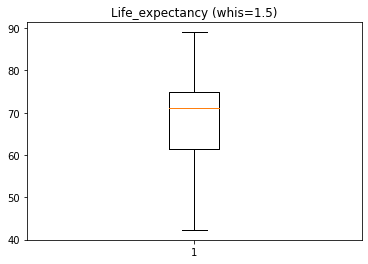

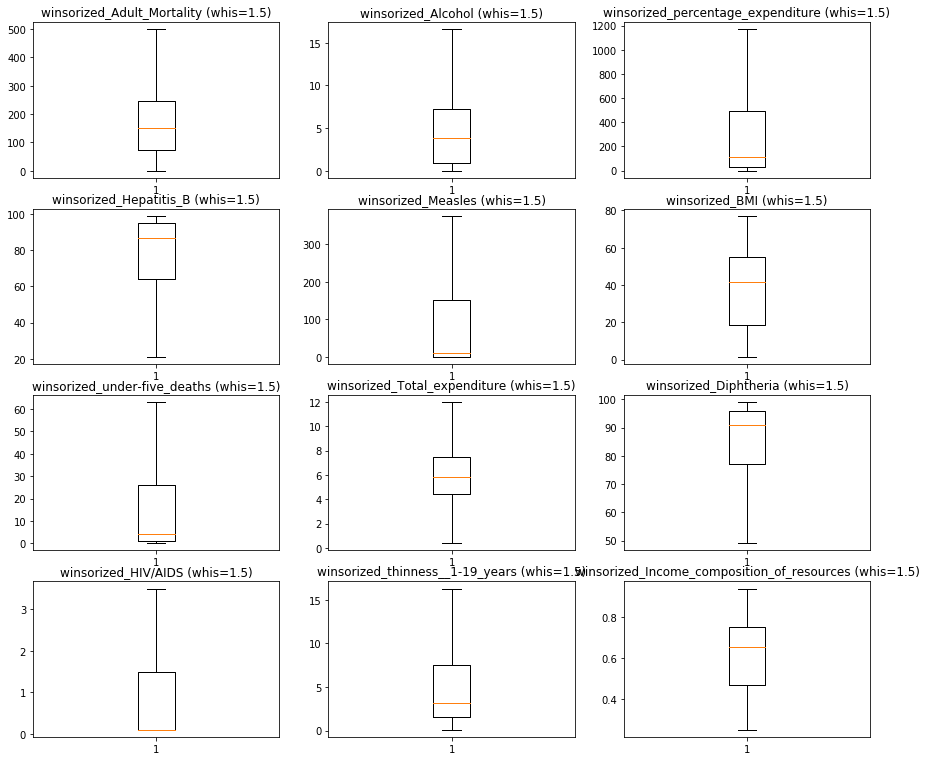

In [157]:
# data visulization
        
plt.boxplot(df_trimmed['winsorized_'+'Life_expectancy'])
plt.title("{} (whis=1.5)".format('Life_expectancy'))
plt.show()

plt.figure(figsize=(15, 20))
for col,index in zip(df_trimmed.columns.unique()[1:], range(len(df_trimmed.columns.unique()[1:]))):
    plt.subplot(6,3,index+1)
    plt.boxplot(df_trimmed[col])
    plt.title("{} (whis=1.5)".format(col))
plt.show()

df_trial2 = df_winsor.copy()

### step 6. 2 data exploration
- for univariant analysis, we can plot the distribution using histogram
- note that for some cases normaility is required, so we can perform boxcox tranformation to make the distribution more normal

- for multivariant analysis, we care about the correlationship between each variable and our target varialbe, also coorelationship between each non-target variable.
- we can use scatter plot to visulize the correlationship
- we can calculate correlation coefficient (CC) to quantify correlationship and use heat map to display that, which is helpful when illustrating correlationship between each pair of the non-target variables.
- we can spot some variables have high-correlation with the target variables, i.e. "income_composition_of_resource" (cc=0.82), "HIV/AIDS" (cc=-0.79), "schooling" (cc=0.76). (please see analysis in step 5)
- For cases including PCA, we might want to get rid of certain variables that are high-coorelated with each other within the non-target variable pairs, as well as variables that have very low correlation with the target variables.

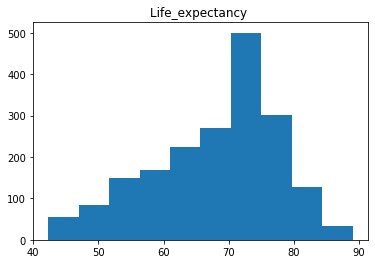

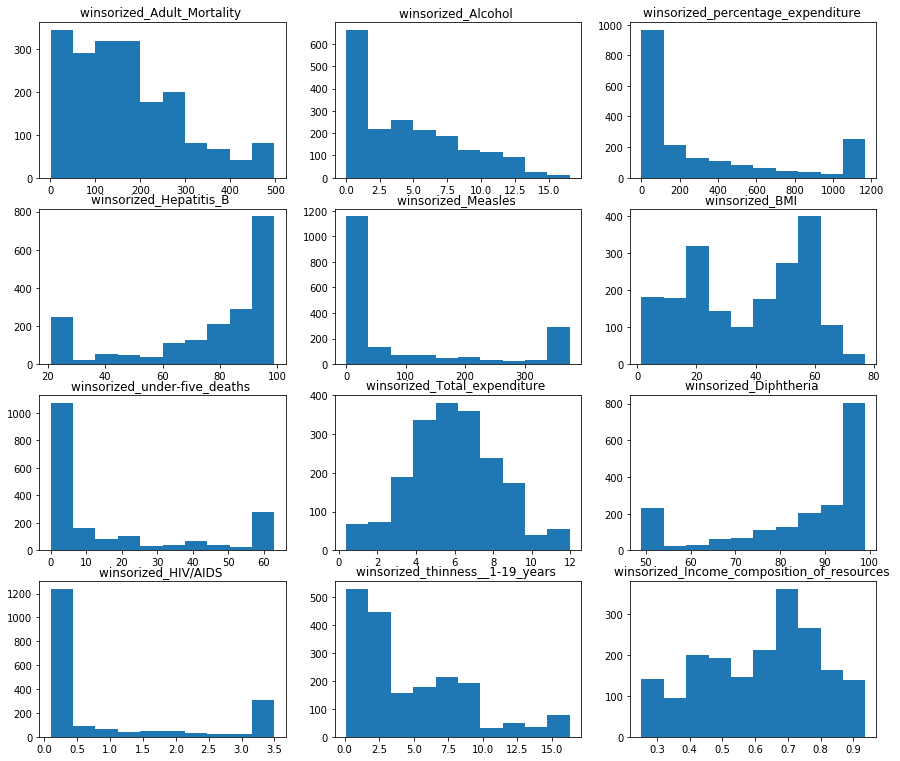

In [158]:
# univariant exploration
# visulization of distribution using histogram

plt.hist(df_trimmed['winsorized_'+'Life_expectancy'])
plt.title("{} ".format('Life_expectancy'))
plt.show()

plt.figure(figsize=(15, 20))
for col,index in zip(df_trimmed.columns.unique()[1:], range(len(df_trimmed.columns.unique()[1:]))):
    plt.subplot(6,3,index+1)
    plt.hist(df_trimmed[col])
    plt.title("{} ".format(col))
plt.show()

In [159]:
# perform normality check
from scipy.stats import jarque_bera
from scipy.stats import normaltest

for col,index in zip(df_trimmed.columns.unique(), range(len(df_trimmed.columns.unique()))):
    jb_stats = jarque_bera(df_trimmed[col])
    norm_stats = normaltest(df_trimmed[col])
    print(col)
    print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
    print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
    print('-------------')



winsorized_Life_expectancy
Jarque-Bera test statistics is 103.25457059872619 and p value is 0.0
Normality test statistics is 102.41474561002357 and p value is 5.766609698138275e-23
-------------
winsorized_Adult_Mortality
Jarque-Bera test statistics is 204.62350731225183 and p value is 0.0
Normality test statistics is 162.24734352172874 and p value is 5.8672825437905e-36
-------------
winsorized_Alcohol
Jarque-Bera test statistics is 167.20716355595135 and p value is 0.0
Normality test statistics is 173.9788761820804 and p value is 1.6632864639852634e-38
-------------
winsorized_percentage_expenditure
Jarque-Bera test statistics is 465.0988908562595 and p value is 0.0
Normality test statistics is 300.98420015499426 and p value is 4.3864316479997565e-66
-------------
winsorized_Hepatitis_B
Jarque-Bera test statistics is 428.8514597008931 and p value is 0.0
Normality test statistics is 284.2200547994192 and p value is 1.9160166431621142e-62
-------------
winsorized_Measles
Jarque-Bera te

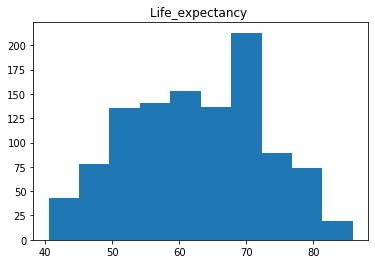

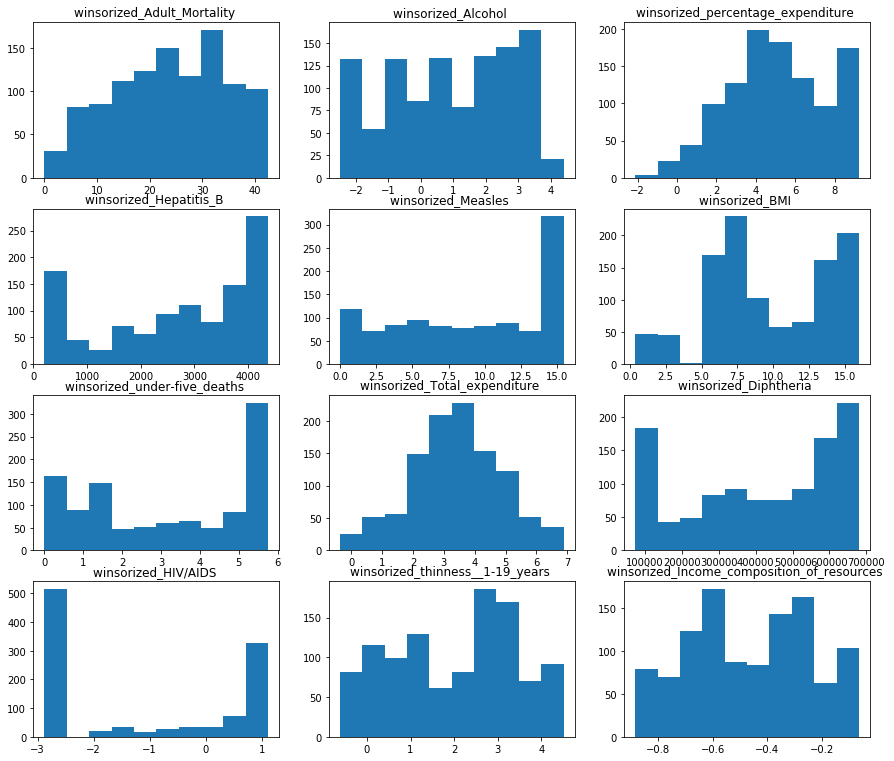

In [160]:
from scipy.stats import boxcox
    
# perform boxcox
# make a copy
df_boxcox = df_trimmed.copy()

# boxcox require all datapoints larger than zero, perform the following:
df_boxcox.iloc[np.abs(df_boxcox)<.001] = np.nan
df_boxcox = df_boxcox.dropna()

for col,index in zip(df_boxcox.columns.unique(), range(len(df_boxcox.columns.unique()))):
    df_boxcox[col], _ = boxcox(df_boxcox[col])

# display the distribution

plt.hist(df_boxcox['winsorized_'+'Life_expectancy'])
plt.title("{} ".format('Life_expectancy'))
plt.show()

plt.figure(figsize=(15, 20))
for col,index in zip(df_boxcox.columns.unique()[1:], range(len(df_boxcox.columns.unique()[1:]))):
    plt.subplot(6,3,index+1)
    plt.hist(df_boxcox[col])
    plt.title("{} ".format(col))
plt.show()

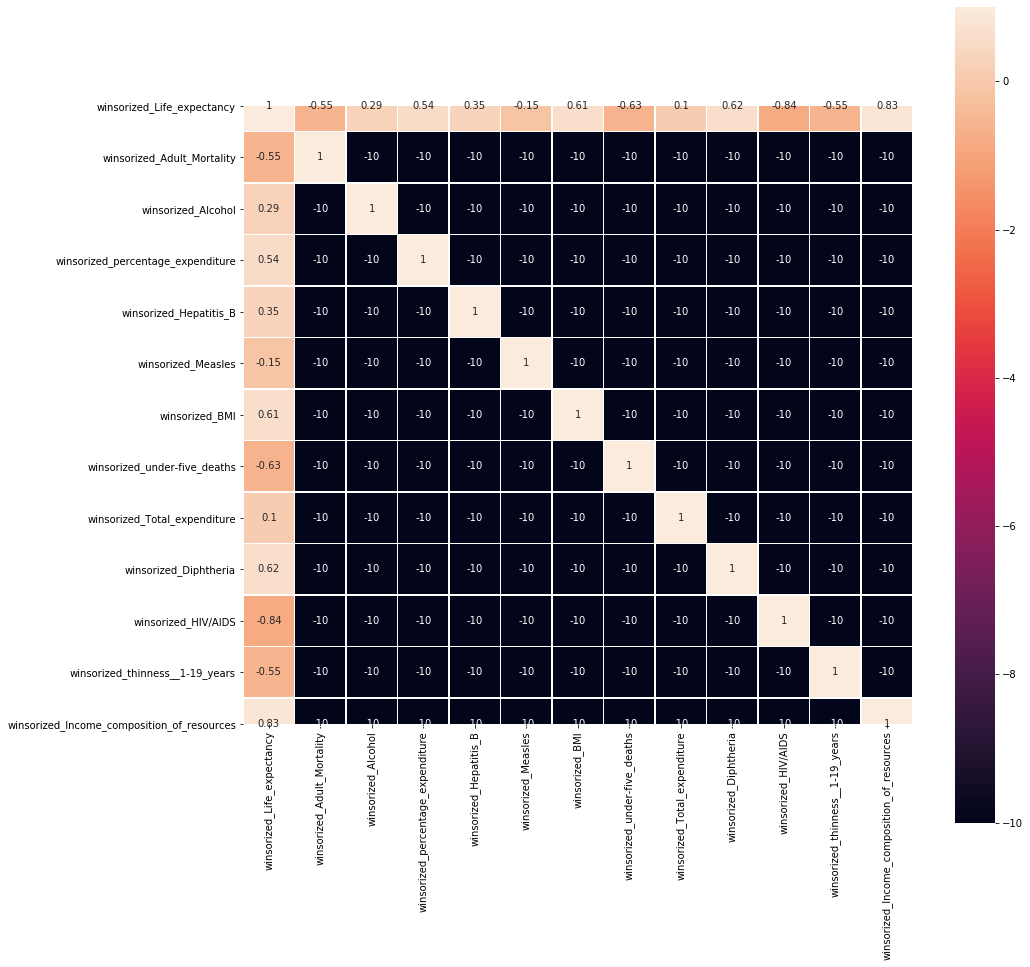

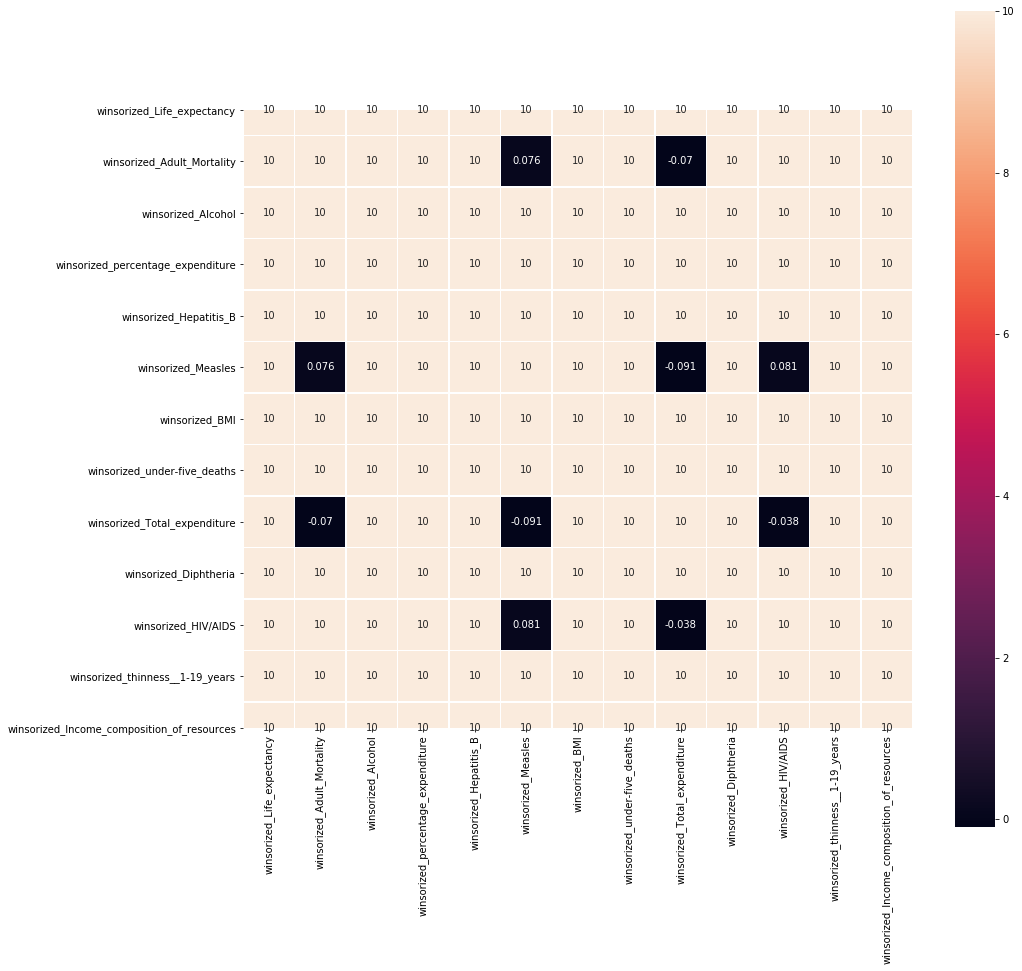

In [161]:
# explore multivariant variable for variables after coxbox, check correlation coefficient once again

# calculate the correlation coefficient and illustrate using heatmap
plt.figure(figsize=(15,15))
df_corr_matrix = df_boxcox.corr()
# apply a mask on the corr, that only show high correlation (cc>=0.7), and under triangle part
df_corr_matrix.iloc[1:,1:][np.abs(df_corr_matrix)<.7] = -10
# draw the heatmap using seaborn.
sns.heatmap(df_corr_matrix, square=True, annot=True, linewidths=.5)
# plt.title("correlation matrix")
plt.show()


plt.figure(figsize=(15,15))
df_corr_matrix = df_boxcox.corr()
# apply a mask on the corr, that only show low correlation (cc<0.1), and under triangle part
df_corr_matrix[np.abs(df_corr_matrix)>.1] = 10
# draw the heatmap using seaborn.
sns.heatmap(df_corr_matrix, square=True, annot=True, linewidths=.5)
# plt.title("correlation matrix")
plt.show()

### step 6. 3 feature engineering - PCA
- the former steps ensure that the prerequisites for performing PCA satisfiy
- we have tweleve variables before performing PCA, and we can choose the first 8 principle compoenets. 
- The choice is made based on the eigen values and their explained variance ratio. Note that, such first 8 principle components, in total, can explain 90% of the varaiance.

In [162]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA# perform PCA, (the prerequisites for PCA satisfied)

# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df_boxcox.iloc[:,1:])
# np.shape(X)

sklearn_pca = PCA(n_components=12)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)



The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.41112147 0.1041405  0.09474679 0.08115118 0.0702206  0.05030805
 0.04668395 0.03823056 0.03624954 0.02868264 0.02236696 0.01609775]


The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.41112147 0.1041405  0.09474679 0.08115118 0.0702206  0.05030805
 0.04668395 0.03823056 0.03624954 0.02868264 0.02236696 0.01609775]


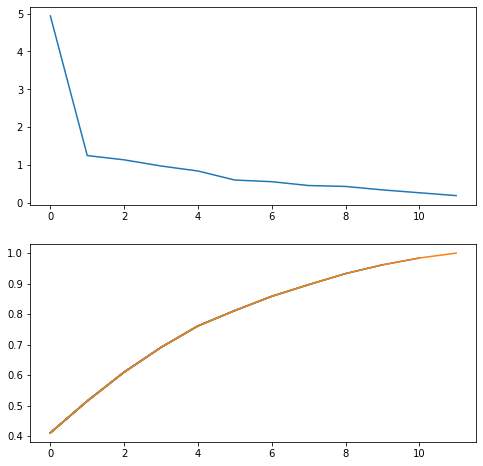

In [163]:
# Calculating eigenvalues and eigenvectors.
Cx = np.cov(X.T)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
# sort
idx = eig_val_cov.argsort()[::-1]   
eig_val_cov = eig_val_cov[idx]
eig_vec_cov = eig_vec_cov[:,idx]

# Inspecting the eigenvalues and eigenvectors.
# for i in range(len(eig_val_cov)):
#     eigvec_cov = eig_vec_cov[:, i].T
#     print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
#     print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
#     print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(eig_val_cov)
plt.subplot(2,1,2)
eigen_sum = 0
elgen_sum_list =[]
for eigen_val in sklearn_pca.explained_variance_ratio_:
    eigen_sum += eigen_val
    elgen_sum_list.append(eigen_sum)
    plt.plot(elgen_sum_list)
    
plt.show()

### step 6. 4 one more point
the boxcox transformation was performed after we drop the outliers, but note that boxcox transformation will affect distritrion, thus the outliers. If we have performed the boxcox transformation before not after outlier handeling, then result would be different.